<a href="https://colab.research.google.com/github/MarioJOP/Ola-mundo/blob/main/projeto_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Importando a base de dados:


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/curso_ML/projeto2/data_cancer2.csv')
df_copy = df.copy()
df['Unnamed: 32'].unique()

array([nan])

In [4]:
# Como a coluna "Unnamed: 32" está apenas com valores NaN, irei exclui-la.
df_copy.drop('Unnamed: 32', axis=1, inplace=True)

In [5]:
df_copy

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Tratamento/Exploração dos Dados:

In [6]:
df_copy.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df_copy.duplicated().sum()

0

In [8]:
df_copy.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# A coluna "id" não será necessária.
df_copy.drop('id', axis=1, inplace=True)

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

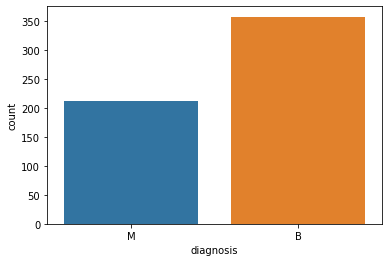

In [11]:
sns.countplot(df_copy.diagnosis)

In [12]:
df_copy.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df_copy

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
df_copy.diagnosis.replace({'M':0, 'B':1}, inplace=True)

<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

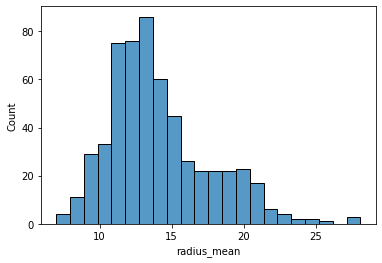

In [15]:
sns.histplot(df_copy.radius_mean)

* Aparentemente o gráfico do raio médio tende a ser uma distribuição
assimétrica à direita.
* Percebe-se também que a média dos valores é maior que a mediana, uma das características da distribuição
assimétrica à direita.


<AxesSubplot:xlabel='texture_mean', ylabel='Count'>

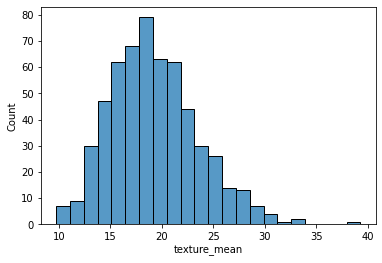

In [16]:
sns.histplot(df_copy.texture_mean)

<AxesSubplot:xlabel='perimeter_mean', ylabel='Count'>

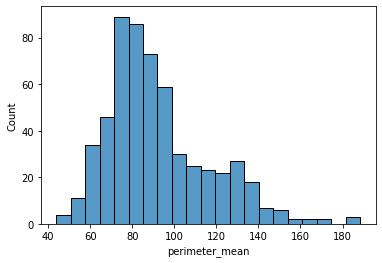

In [17]:
sns.histplot(df_copy.perimeter_mean)

<AxesSubplot:xlabel='concave points_mean', ylabel='Count'>

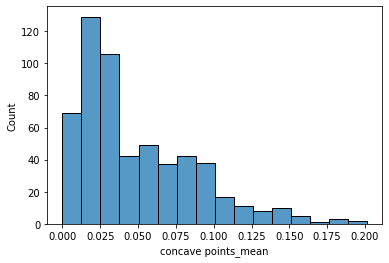

In [18]:
sns.histplot(df_copy['concave points_mean'])

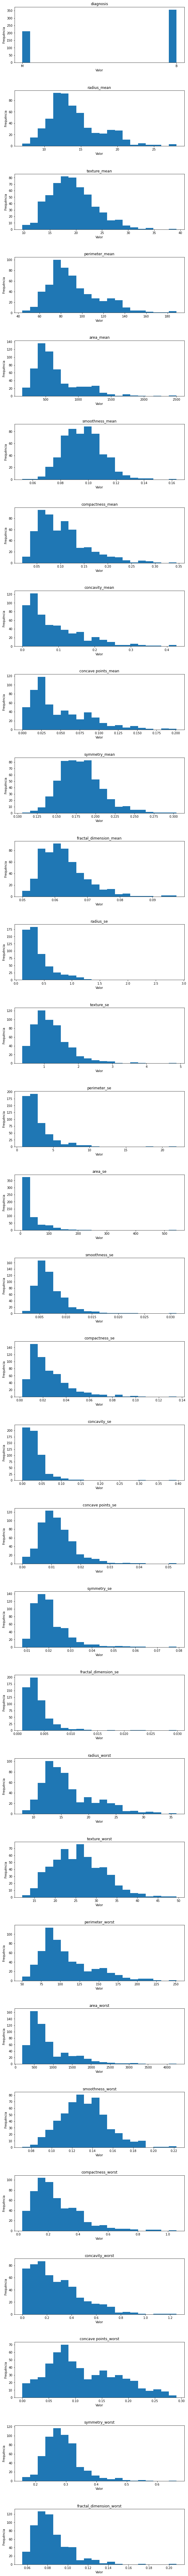

In [19]:
colunas_numericas = list(df_copy.select_dtypes(include=['float64', 'int64']).columns)
bins = 20

fig, axs = plt.subplots(nrows=len(colunas_numericas), figsize=(10, 5*len(colunas_numericas)))
fig.subplots_adjust(hspace=0.5)

for i, coluna in enumerate(colunas_numericas):
    axs[i].hist(df[coluna], bins=bins)
    axs[i].set_title(coluna)
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frequência')
plt.show()

In [20]:
px.box(df_copy, x=df_copy.radius_mean)

# Definindo as variáveis preditoras e a variável alvo:

In [21]:
preditores = df_copy.drop('diagnosis', axis=1).values
alvo = df_copy['diagnosis'].values

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
preditores_esc = sc.fit_transform(preditores)

# Criação do modelo de Machine Learning (Aprendizado de Máquinas):



## Importando métricas:

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Separando entre dados de treino e dados de teste:

In [34]:
from sklearn.model_selection import train_test_split

In [158]:
x_treino, x_teste, y_treino, y_teste = train_test_split(preditores, alvo, test_size=0.3, random_state=0)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=30, shuffle=True, random_state=1)

## Naive Bayes - GaussianNB:

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
naive = GaussianNB()
naive.fit(x_treino, y_treino)

GaussianNB()

In [45]:
previsao_naive = naive.predict(x_teste)

In [46]:
print('Acurácia: %.2f%%' % (accuracy_score(previsao_naive, y_teste)*100))

Acurácia: 91.23%


In [47]:
previsao_naive_treino = naive.predict(x_treino)

In [48]:
print('Acurácia: %.2f%%' % (accuracy_score(previsao_naive_treino, y_treino)*100))

Acurácia: 94.22%


In [49]:
confusion_matrix(previsao_naive, y_teste)

array([[57,  9],
       [ 6, 99]])

In [50]:
print(classification_report(previsao_naive, y_teste))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        66
           1       0.92      0.94      0.93       105

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



In [51]:
modelo = GaussianNB()
validacao_cruzada = cross_val_score(modelo, preditores, alvo, cv=kfold)
print('Acurácia Média: %.2f%%' % (validacao_cruzada.mean()*100))

Acurácia Média: 94.03%


## Logistic Regression (Regressão Logística):

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
LR = LogisticRegression(max_iter=3700, C=1, penalty='l2', solver='lbfgs')
LR.fit(x_treino, y_treino)

LogisticRegression(C=1, max_iter=3700)

In [54]:
previsao_LR = LR.predict(x_teste)

In [55]:
print('Acurácia: %.2f%%' % (accuracy_score(previsao_LR, y_teste)*100))

Acurácia: 97.66%


In [56]:
previsao_LR_treino = LR.predict(x_treino)

In [57]:
print('Acurácia: %.2f%%' % (accuracy_score(previsao_LR_treino, y_treino)*100))

Acurácia: 98.99%


In [61]:
modelo = LogisticRegression(max_iter=3700, C=1, penalty='l2', solver='lbfgs')
validacao_cruzada = cross_val_score(modelo, preditores, alvo, cv=kfold)
print('Acurácia Média: %.2f%%' % (validacao_cruzada.mean()*100))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

Acurácia Média: 95.25%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [59]:
print(classification_report(previsao_LR, y_teste))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97        61
           1       0.99      0.97      0.98       110

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



In [60]:
confusion_matrix(previsao_LR, y_teste)

array([[ 60,   1],
       [  3, 107]])

## Support Vector Machine Classifier - SVC:

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC(kernel='rbf', C=4)
svc.fit(x_treino, y_treino)

SVC(C=4)

In [64]:
previsao_svc = svc.predict(x_teste)

In [65]:
print('Acurácia: %.2f%%' % (accuracy_score(previsao_svc, y_teste)*100))

Acurácia: 98.25%


In [66]:
previsao_svc_treino = svc.predict(x_treino)

In [67]:
print('Acurácia: %.2f%%' % (accuracy_score(previsao_svc_treino, y_treino)*100))

Acurácia: 98.74%


In [68]:
modelo = SVC(kernel='rbf', C=4)
validacao_cruzada = cross_val_score(modelo, preditores, alvo, cv=kfold)
print('Acurácia Média: %.2f%%' % (validacao_cruzada.mean()*100))

Acurácia Média: 91.92%


In [69]:
print(classification_report(previsao_svc, y_teste))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [70]:
confusion_matrix(previsao_svc, y_teste)

array([[ 62,   2],
       [  1, 106]])

## Decision Tree (Árvore de Decisão):

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
arvore = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [82]:
previsao_arvore = arvore.predict(x_teste)

In [83]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsao_arvore)*100))

Acurácia: 94.74%


In [84]:
previsao_arvore_treino = arvore.predict(x_treino)

In [85]:
print('Acurácia: %.2f%%' % (accuracy_score(y_treino, previsao_arvore_treino)*100))

Acurácia: 96.73%


In [86]:
confusion_matrix(previsao_arvore_treino, y_treino)

array([[139,   3],
       [ 10, 246]])

In [87]:
confusion_matrix(previsao_arvore, y_teste)

array([[ 59,   5],
       [  4, 103]])

In [88]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
validacao_cruzada = cross_val_score(modelo, preditores, alvo, cv=kfold)
print('Acurácia Média: %.2f%%' % (validacao_cruzada.mean()*100))

Acurácia Média: 91.22%


## RandomForest (Floresta Aleatória):

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
floresta = RandomForestClassifier(criterion='gini', max_depth=3, random_state=0)
floresta.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=3, random_state=0)

In [91]:
previsao_floresta = floresta.predict(x_teste)

In [92]:
print('Acurácia: %.2f%%'% (accuracy_score(previsao_floresta, y_teste)*100))

Acurácia: 95.32%


In [93]:
previsao_floresta_treino = floresta.predict(x_treino)

In [94]:
print('Acurácia: %.2f%%'% (accuracy_score(previsao_floresta_treino, y_treino)*100))

Acurácia: 97.99%


In [95]:
modelo = RandomForestClassifier(criterion='entropy', max_depth=3, random_state=1)
validacao_cruzada = cross_val_score(modelo, preditores, alvo, cv=kfold)
print('Acurácia Média: %.2f%%' % (validacao_cruzada.mean()*100))

Acurácia Média: 95.09%


In [96]:
confusion_matrix(previsao_floresta, y_teste)

array([[ 59,   4],
       [  4, 104]])

## KNN:

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn = KNeighborsClassifier(n_neighbors=4, p=1)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=4, p=1)

In [119]:
previsao_knn = knn.predict(x_teste)

In [120]:
print('Acurácia: %.2f%%'% (accuracy_score(previsao_knn, y_teste)*100))

Acurácia: 95.91%


In [121]:
previsao_knn_treino = knn.predict(x_treino)

In [102]:
print('Acurácia: %.2f%%'% (accuracy_score(previsao_knn_treino, y_treino)*100))

Acurácia: 96.73%


In [103]:
modelo = KNeighborsClassifier(n_neighbors=11, p=1)
validacao_cruzada = cross_val_score(modelo, preditores, alvo, cv=kfold)
print('Acurácia Média: %.2f%%' % (validacao_cruzada.mean()*100))

Acurácia Média: 93.66%


In [104]:
confusion_matrix(previsao_knn, y_teste)

array([[ 57,   1],
       [  6, 107]])

## XGBoost:

In [122]:
from xgboost import XGBClassifier

In [123]:
xgb = XGBClassifier(random_state=0, max_depth=1, objective='binary:logistic', n_estimators=50)
xgb.fit(x_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [124]:
previsao_xgb = xgb.predict(x_teste)

In [125]:
print('Acurácia: %.2f%%'% (accuracy_score(previsao_xgb, y_teste)*100))

Acurácia: 97.66%


In [126]:
previsao_xgb_treino = xgb.predict(x_treino)

In [127]:
print('Acurácia: %.2f%%'% (accuracy_score(previsao_xgb_treino, y_treino)*100))

Acurácia: 98.99%


In [128]:
modelo = XGBClassifier(random_state=0, max_depth=1, objective='binary:logistic', n_estimators=50, learning_rate=0.05)
validacao_cruzada = cross_val_score(modelo, preditores, alvo, cv=kfold)
print('Acurácia Média: %.2f%%' % (validacao_cruzada.mean()*100))
for valor in validacao_cruzada:
    print(f'{valor*100:.2f}')

Acurácia Média: 92.98%
89.47
100.00
94.74
89.47
89.47
94.74
89.47
84.21
84.21
89.47
89.47
100.00
89.47
94.74
94.74
94.74
89.47
94.74
100.00
100.00
89.47
94.74
100.00
84.21
89.47
100.00
100.00
89.47
89.47
100.00


In [129]:
confusion_matrix(previsao_xgb, y_teste)

array([[ 60,   1],
       [  3, 107]])

In [130]:
confusion_matrix(previsao_xgb_treino, y_treino)

array([[145,   0],
       [  4, 249]])

In [131]:
print(classification_report(previsao_xgb, y_teste))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        61
           1       0.99      0.97      0.98       110

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



In [132]:
print(classification_report(previsao_xgb_treino, y_treino))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       145
           1       1.00      0.98      0.99       253

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



## LGBM:

In [133]:
import lightgbm as lgb

In [134]:
dataset = lgb.Dataset(x_treino, label=y_treino)

In [135]:
parametros = {'num_leaves':100,
              'objective':'binary',
              'max_depth':2,
              'learning_rate':0.05,
              'max_bin':150

} 

In [136]:
lgbm = lgb.train(parametros, dataset, num_boost_round=150)

In [137]:
previsao_lgbm = lgbm.predict(x_teste)
previsao_lgbm.shape

(171,)

In [138]:
for i in range(0, 171):
    if previsao_lgbm[i] >= 0.5:
        previsao_lgbm[i] = 1
    else:
        previsao_lgbm[i] = 0
previsao_lgbm

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1.])

In [139]:
print('Acurácia: %.2f%%'% (accuracy_score(previsao_lgbm, y_teste)*100))

Acurácia: 97.08%


In [140]:
previsao_lgbm_treino = lgbm.predict(x_treino)
previsao_lgbm_treino.shape

(398,)

In [141]:
for i in range(0, 398):
    if previsao_lgbm_treino[i] >= 0.5:
        previsao_lgbm_treino[i] = 1
    else:
        previsao_lgbm_treino[i] = 0

In [142]:
print('Acurácia: %.2f%%'% (accuracy_score(previsao_lgbm_treino, y_treino)*100))

Acurácia: 99.50%


In [143]:
from lightgbm.sklearn import LGBMClassifier
modelo = LGBMClassifier(num_leaves=100, objective='binary', max_depth=2, learning_rate=0.05, max_bin=150)
validacao_cruzada = cross_val_score(modelo, preditores, alvo, cv=kfold)
print('Acurácia Média: %.2f%%' % (validacao_cruzada.mean()*100))

Acurácia Média: 95.79%


In [144]:
confusion_matrix(previsao_lgbm, y_teste)

array([[ 60,   2],
       [  3, 106]])

## Catboost:

In [159]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
from catboost import CatBoostClassifier

In [161]:
preditores_catboost = df_copy.drop('diagnosis', axis=1)

In [162]:
preditores_catboost

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [163]:
alvo_catboost = df_copy['diagnosis']
alvo_catboost

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [164]:
x_treino, x_teste, y_treino, y_teste = train_test_split(preditores_catboost, alvo_catboost, test_size=0.15)

In [165]:
catboost = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth=5, eval_metric='Accuracy', random_state=1)

In [166]:
catboost.fit(x_treino, y_treino, plot=True, eval_set=(x_teste, y_teste))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9213251	test: 0.8953488	best: 0.8953488 (0)	total: 19.9ms	remaining: 1.97s
1:	learn: 0.9420290	test: 0.9418605	best: 0.9418605 (1)	total: 39.7ms	remaining: 1.95s
2:	learn: 0.9565217	test: 0.9302326	best: 0.9418605 (1)	total: 51.7ms	remaining: 1.67s
3:	learn: 0.9689441	test: 0.9186047	best: 0.9418605 (1)	total: 66.7ms	remaining: 1.6s
4:	learn: 0.9730849	test: 0.9186047	best: 0.9418605 (1)	total: 83ms	remaining: 1.58s
5:	learn: 0.9689441	test: 0.9302326	best: 0.9418605 (1)	total: 93.2ms	remaining: 1.46s
6:	learn: 0.9751553	test: 0.9418605	best: 0.9418605 (1)	total: 105ms	remaining: 1.4s
7:	learn: 0.9772257	test: 0.9534884	best: 0.9534884 (7)	total: 114ms	remaining: 1.32s
8:	learn: 0.9792961	test: 0.9534884	best: 0.9534884 (7)	total: 128ms	remaining: 1.3s
9:	learn: 0.9813665	test: 0.9534884	best: 0.9534884 (7)	total: 141ms	remaining: 1.26s
10:	learn: 0.9813665	test: 0.9534884	best: 0.9534884 (7)	total: 160ms	remaining: 1.29s
11:	learn: 0.9834369	test: 0.9534884	best: 0.9534884

In [167]:
previsao_cat = catboost.predict(x_teste)

In [168]:
print('Acurácia: %.2f%%'% (accuracy_score(previsao_cat, y_teste)*100))

Acurácia: 97.67%


In [169]:
previsao_cat_treino = catboost.predict(x_treino)

In [170]:
print('Acurácia: %.2f%%'% (accuracy_score(previsao_cat_treino, y_treino)*100))

Acurácia: 99.59%


In [171]:
modelo = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.01, depth=5, eval_metric='Accuracy', random_state=1)
validacao_cruzada = cross_val_score(modelo, preditores, alvo, cv=kfold)
print('Acurácia Média: %.2f%%' % (validacao_cruzada.mean()*100))

0:	learn: 0.9181818	total: 6.44ms	remaining: 637ms
1:	learn: 0.9563636	total: 15.2ms	remaining: 747ms
2:	learn: 0.9490909	total: 25.5ms	remaining: 824ms
3:	learn: 0.9509091	total: 34.4ms	remaining: 825ms
4:	learn: 0.9563636	total: 45.4ms	remaining: 863ms
5:	learn: 0.9545455	total: 62ms	remaining: 972ms
6:	learn: 0.9563636	total: 74ms	remaining: 983ms
7:	learn: 0.9563636	total: 88.6ms	remaining: 1.02s
8:	learn: 0.9636364	total: 99.4ms	remaining: 1s
9:	learn: 0.9636364	total: 109ms	remaining: 985ms
10:	learn: 0.9672727	total: 120ms	remaining: 972ms
11:	learn: 0.9636364	total: 140ms	remaining: 1.03s
12:	learn: 0.9618182	total: 157ms	remaining: 1.05s
13:	learn: 0.9672727	total: 168ms	remaining: 1.03s
14:	learn: 0.9636364	total: 179ms	remaining: 1.01s
15:	learn: 0.9709091	total: 191ms	remaining: 1s
16:	learn: 0.9690909	total: 198ms	remaining: 968ms
17:	learn: 0.9709091	total: 219ms	remaining: 997ms
18:	learn: 0.9690909	total: 229ms	remaining: 978ms
19:	learn: 0.9709091	total: 239ms	remainin

# Considerações:

## Os modelos tiveram as seguintes acurácias:

### Com "preditores":

####Naive Bayes: 92.40%
####Regressão Logística: 95.91%
#### SVC: 95.32%
#### Árvore de decisão: 94.74%
#### Floresta Aleatória: 95.32%
#### KNN: 96.49%
#### XGBoost: 97.66%
#### LGBM: 97.08%
#### Catboost: 97.67%

### Com "preditores_esc":

####Naive Bayes: 91.23%
####Regressão Logística: 97.66%
#### SVC: 98.25%
#### Árvore de decisão: 94.74%
#### Floresta Aleatória: 95.32%
#### KNN: 95.91%
#### XGBoost: 97.66%
#### LGBM: 97.08%
#### Catboost: 97.67%

## O modelo com melhor resultado foi o Support Vector Machine Classifier - SVC: 98.25% de acurácia.
## Os Hiperparametros utilizados foram: 
- kernel='rbf'
- C=4